# **Opnecv 를 이용한 도면 객체간의 선 인식 및 좌표 추출**

참고 이미지 - https://ulsansafety.tistory.com/1700

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

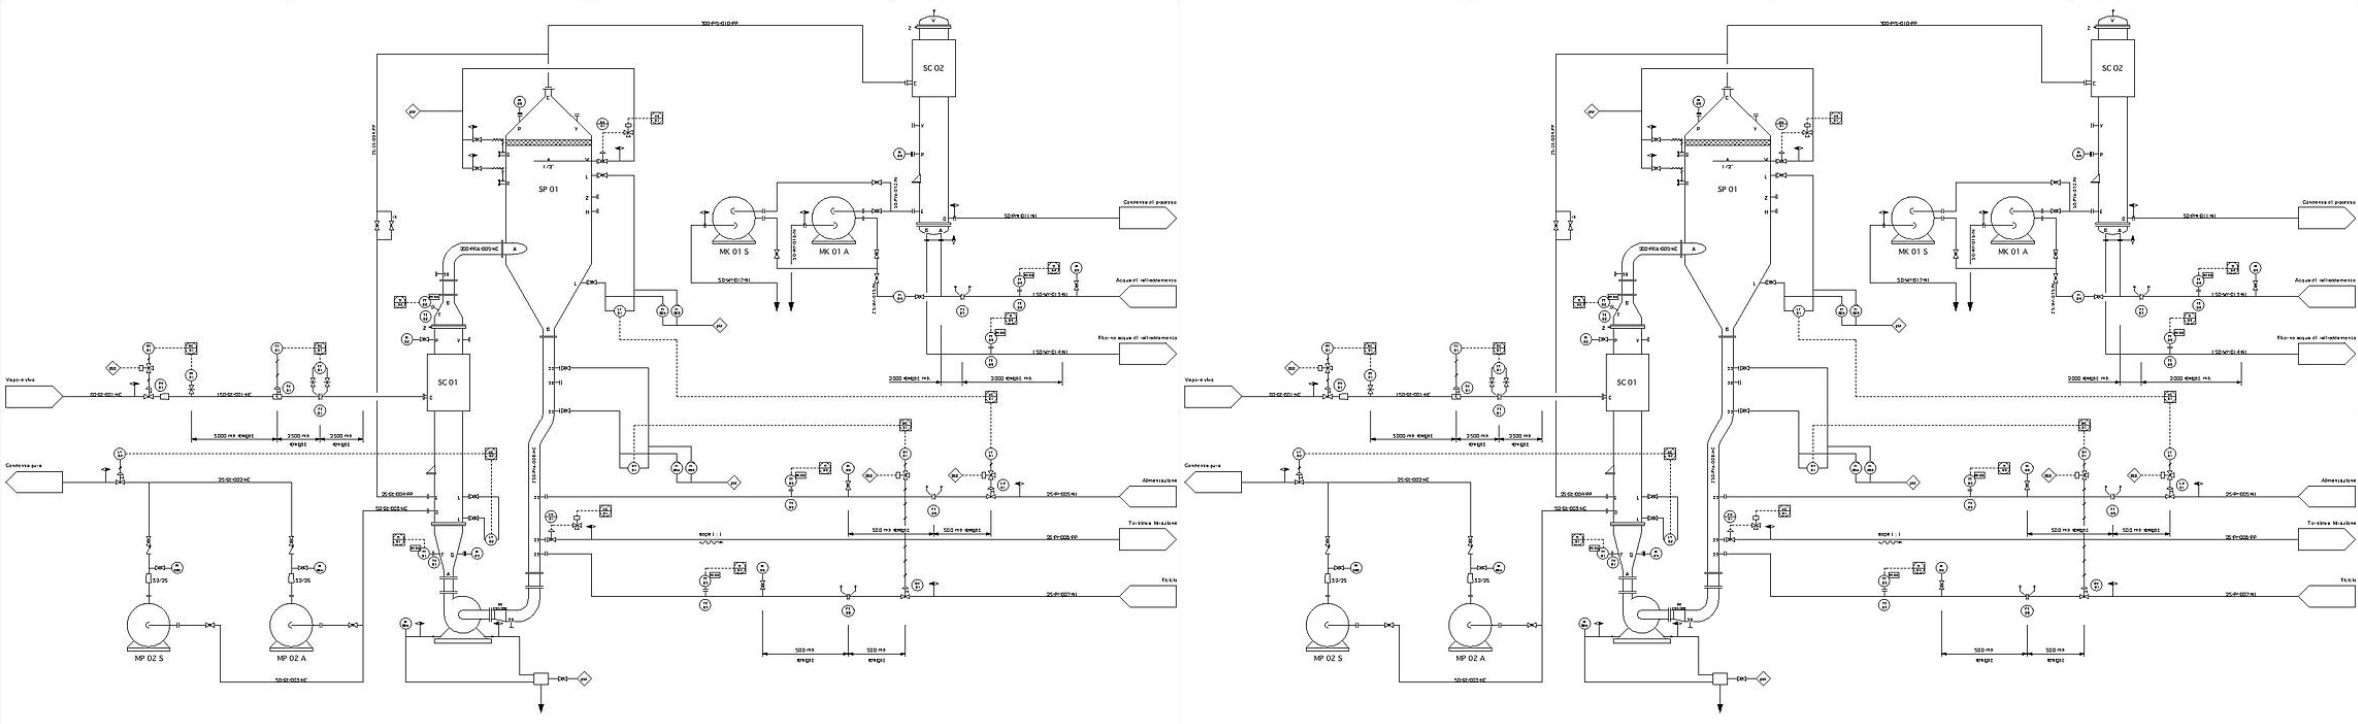

In [1]:
# 양방향 필터
from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2

src = cv2.imread('/content/test.png')

if src is None:
    print('Image load failed!')
    sys.exit()

# 양방향 필터
dst = cv2.bilateralFilter(src, -1, 10, 5)

# 결과 출력
merged = np.hstack((src, dst))

cv2_imshow(merged)
cv2.waitKey()

cv2.destroyAllWindows()

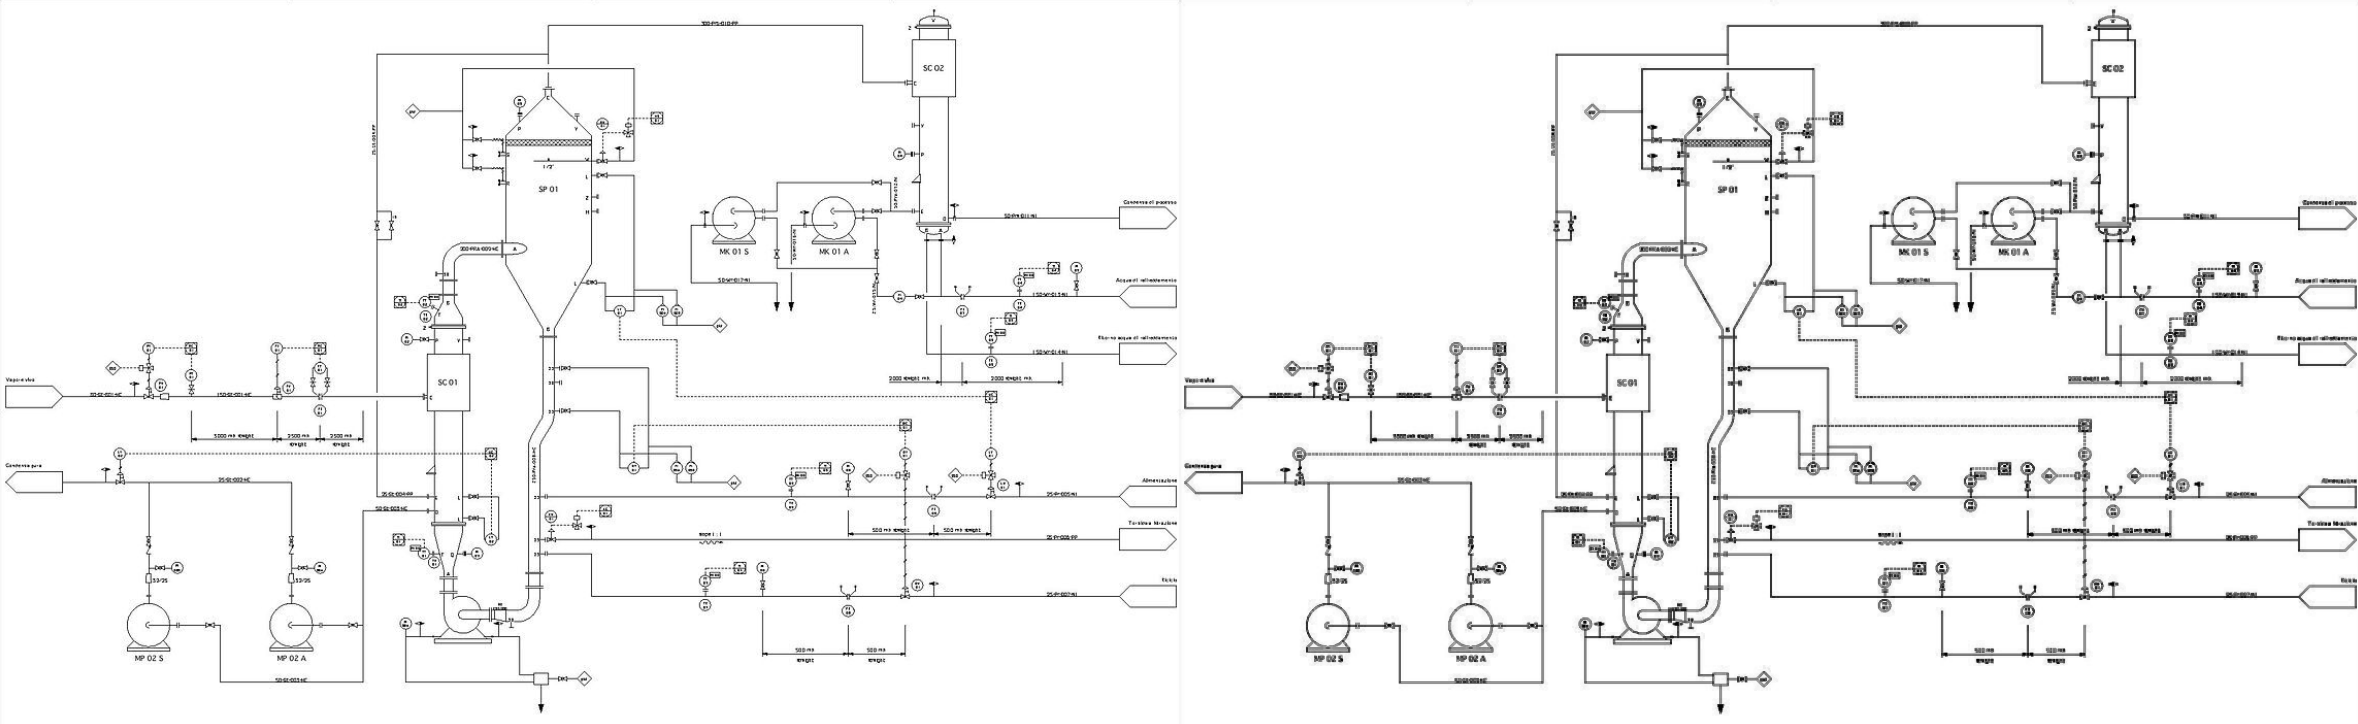

In [2]:
# 모폴로지 침식 연산
from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2

src = cv2.imread('/content/test.png')

if src is None:
    print('Image load failed!')
    sys.exit()

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
# 침식 연산 적용 ---②
erosion = cv2.erode(src, k)

# 결과 출력
merged = np.hstack((src, erosion))

cv2_imshow(merged)
cv2.waitKey()
cv2.destroyAllWindows()

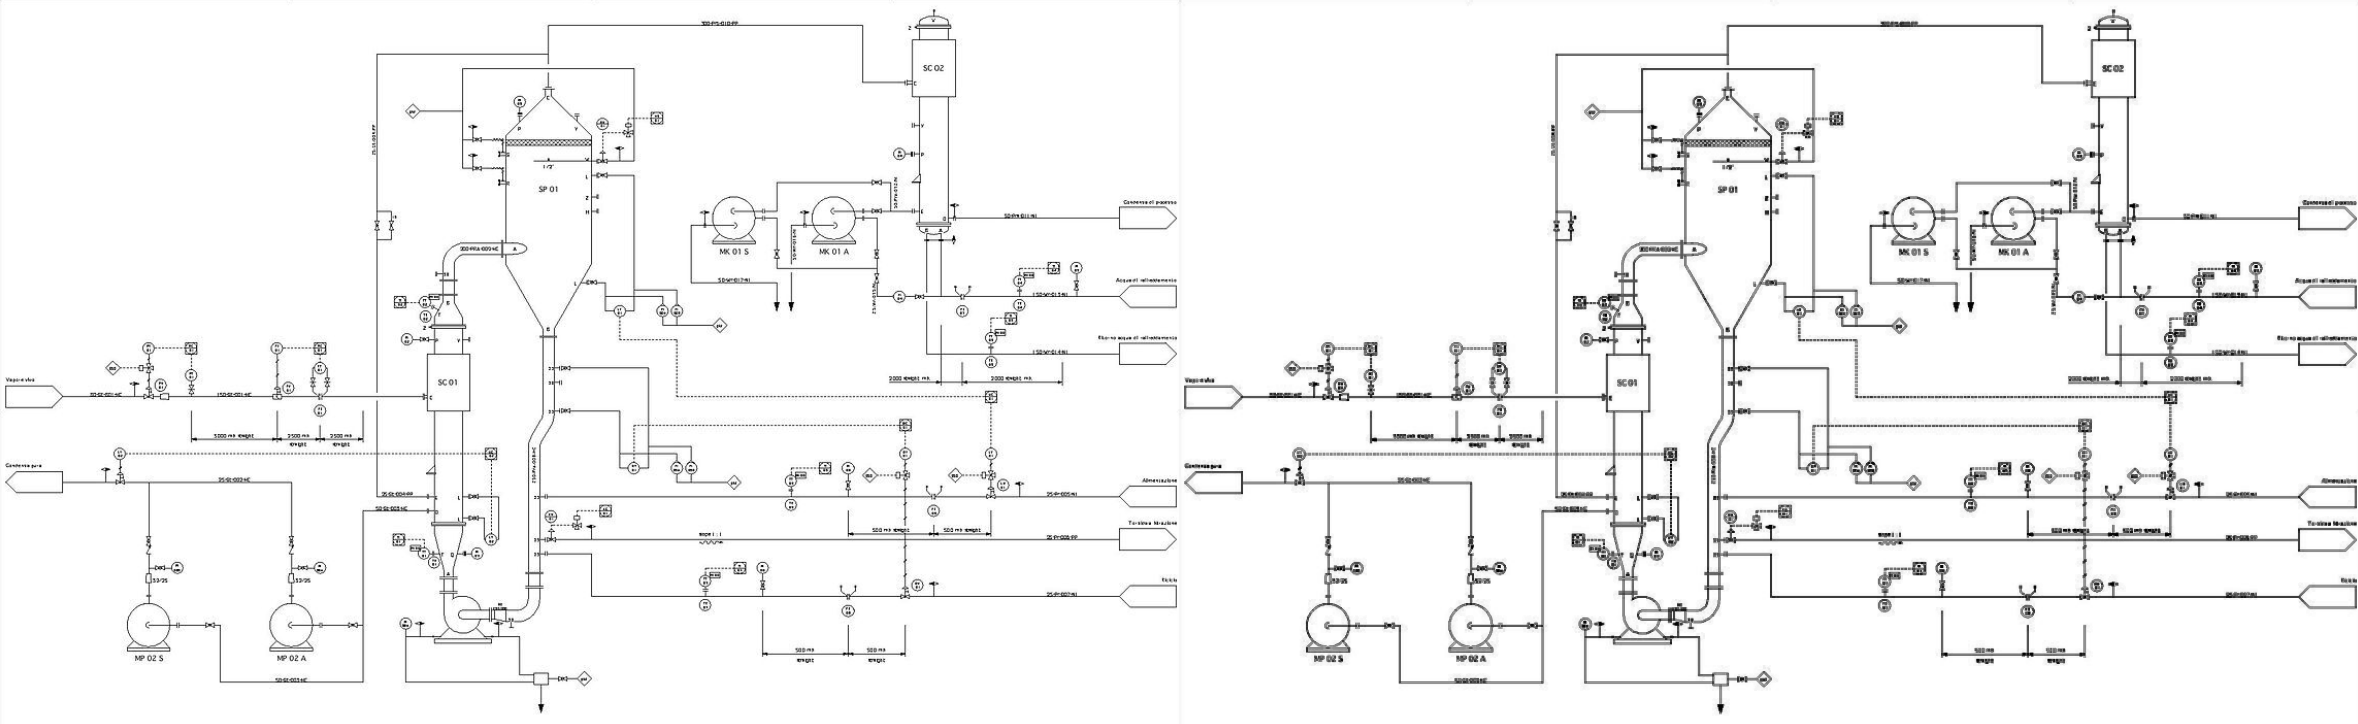

In [3]:
# 모폴로지 팽창 연산
from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2

src = cv2.imread('/content/test.png')

if src is None:
    print('Image load failed!')
    sys.exit()

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 팽창 연산 적용 ---②
dst = cv2.dilate(src, k)

# 결과 출력
merged = np.hstack((src, erosion))

cv2_imshow(merged)
cv2.waitKey()
cv2.destroyAllWindows()

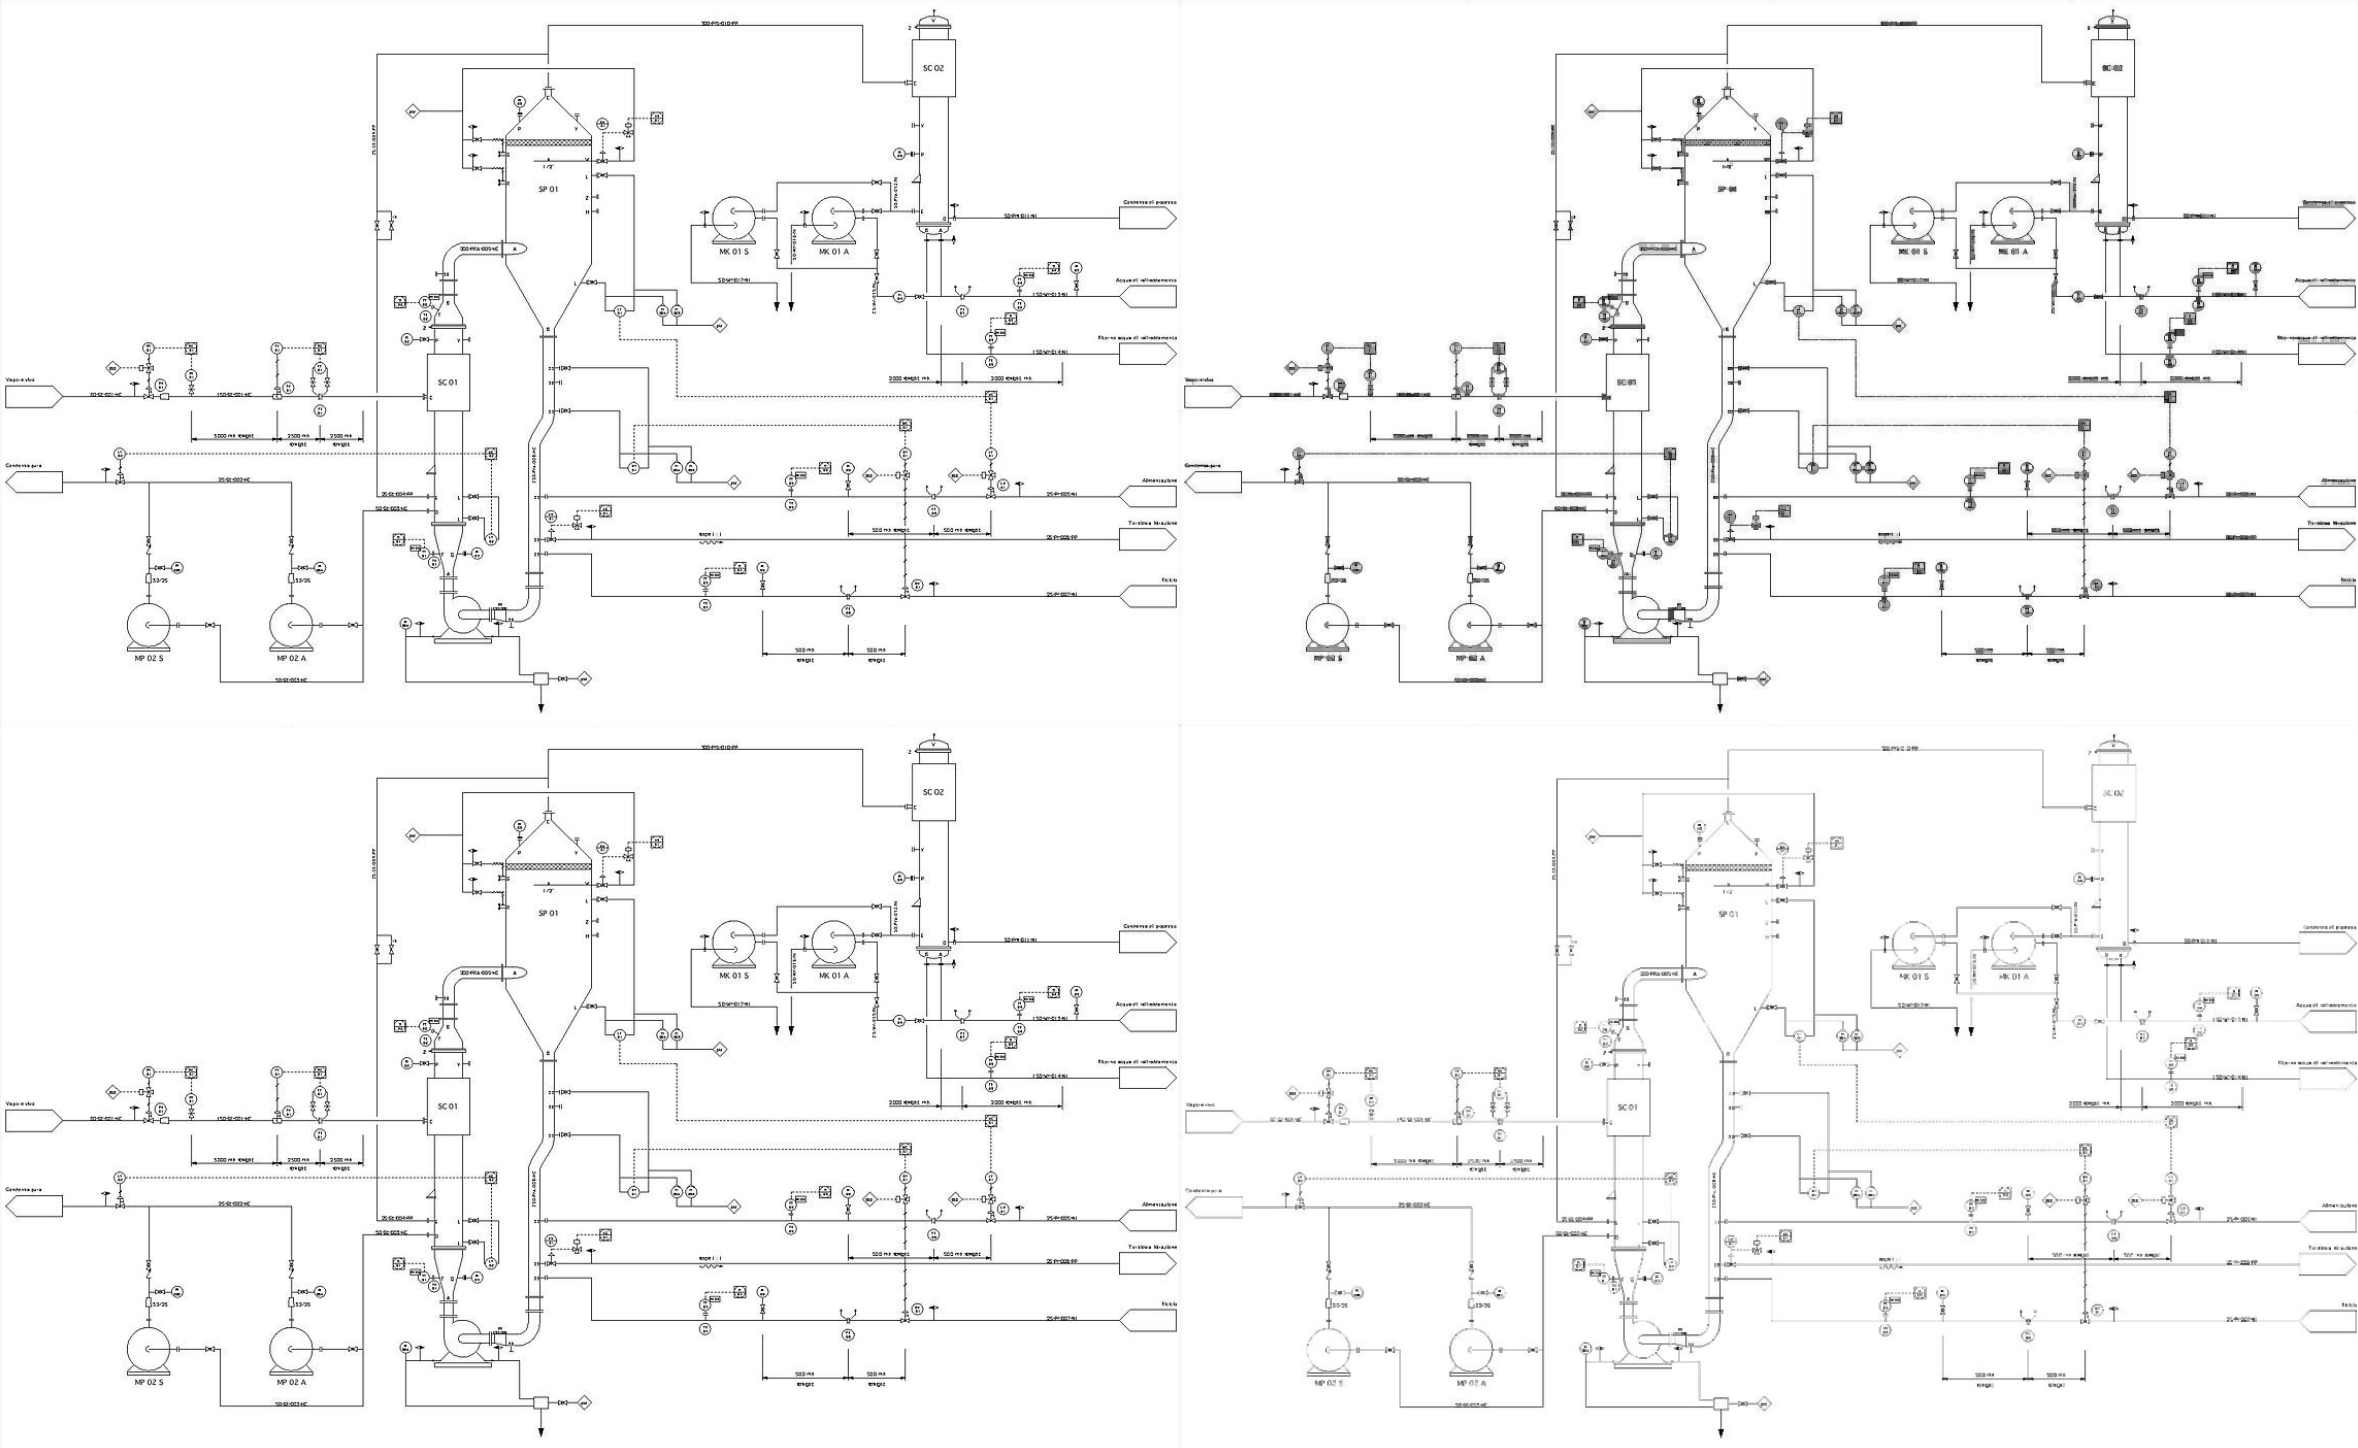

In [4]:
# 열림과 닫힘 연산으로 노이즈 제거 

from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2

src = cv2.imread('/content/test.png')

# 구조화 요소 커널, 사각형 (5x5) 생성 ---①
k1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
k2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
# 열림 연산 적용 ---②
opening = cv2.morphologyEx(src, cv2.MORPH_OPEN, k1)
# 닫힘 연산 적용 ---③
closing = cv2.morphologyEx(src, cv2.MORPH_CLOSE, k2)

# 결과 출력
merged1 = np.hstack((src, opening))
merged2 = np.hstack((src, closing))
merged3 = np.vstack((merged1, merged2))

cv2_imshow(merged3)
cv2.waitKey(0)
cv2.destroyAllWindows()

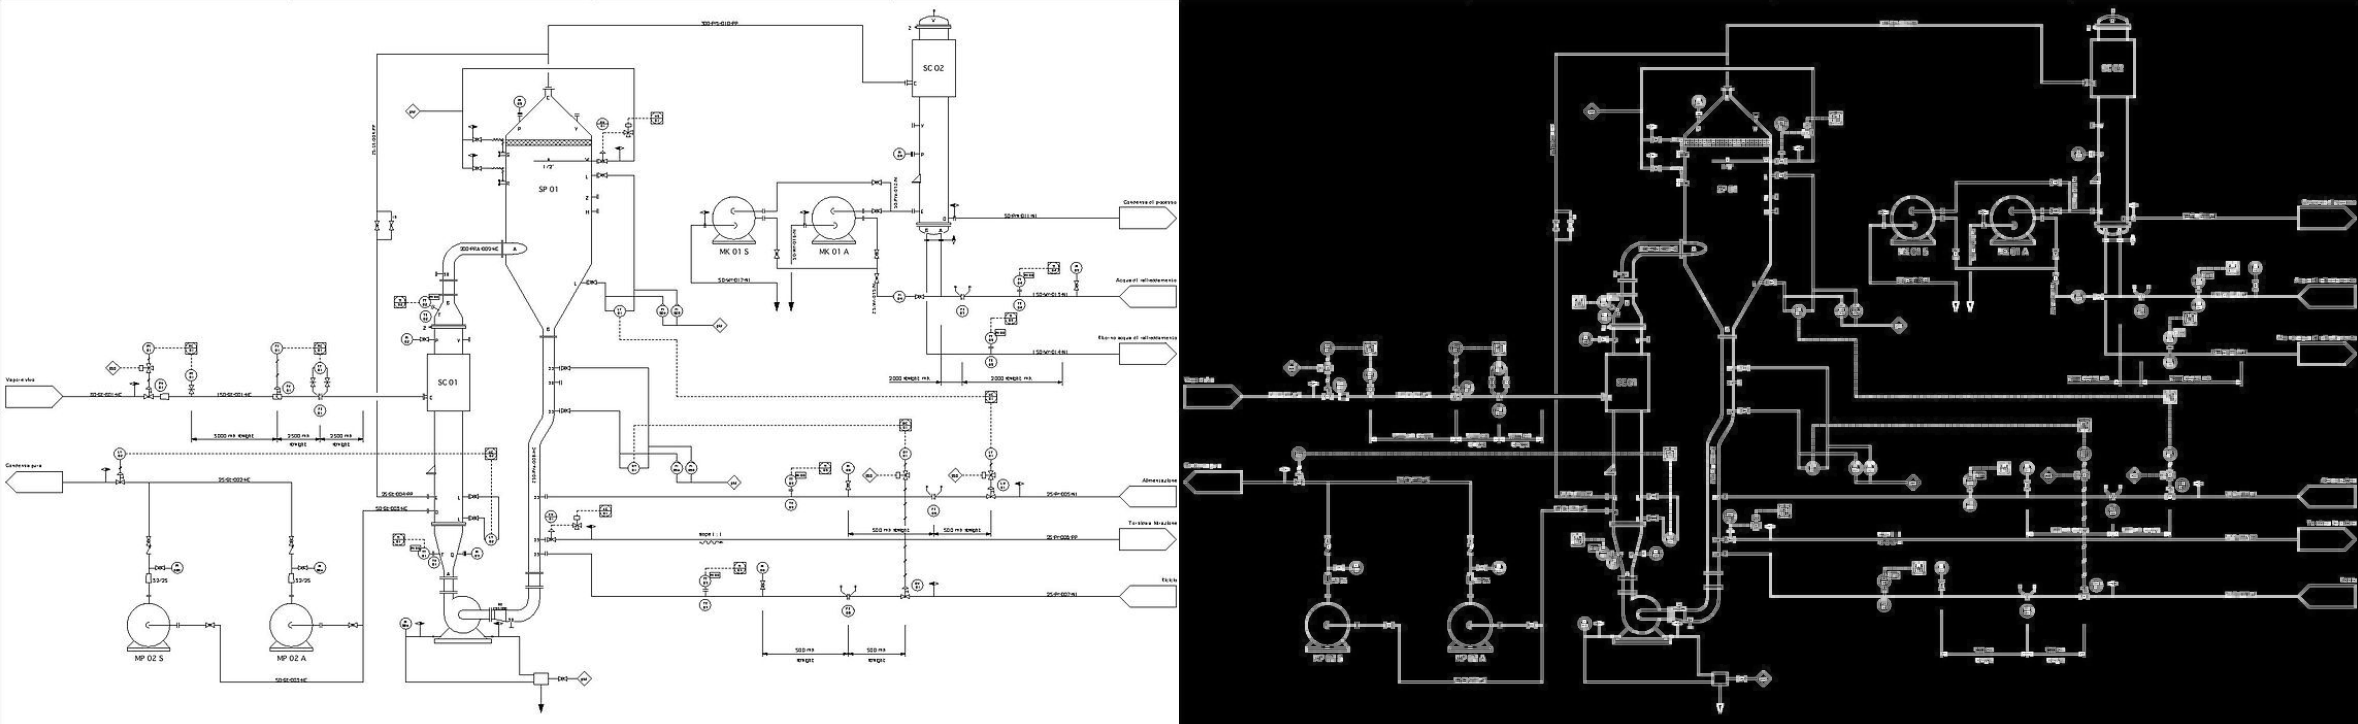

In [5]:
# 그레디언트 연산을 통한 경계 검출

from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2

src = cv2.imread('/content/test.png')
# 열림 연산 적용 후 침식 대신 그레디언트 연산 ---②
gradient = cv2.morphologyEx(src, cv2.MORPH_GRADIENT, k)

# 결과 출력
merged = np.hstack((src, gradient))
cv2_imshow(merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

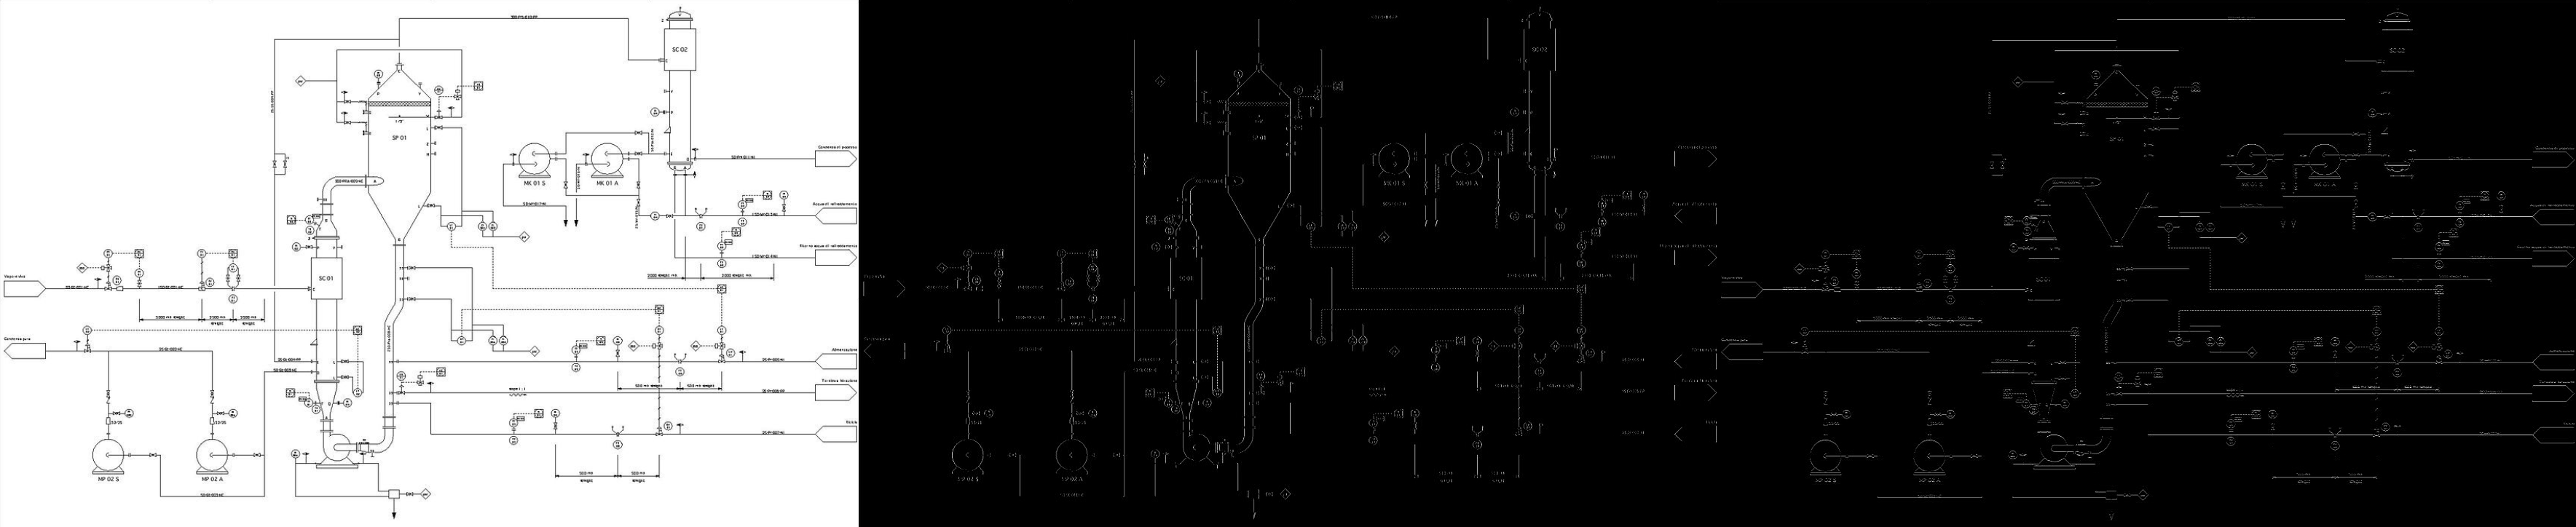

In [6]:
# 미분 필터를 통한 X,Y 경계선 검출

from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2

src = cv2.imread('/content/test.png')

#미분 커널 생성 ---①
gx_kernel = np.array([[ -1, 1]])
gy_kernel = np.array([[ -1],[ 1]])

# 필터 적용 ---②
edge_gx = cv2.filter2D(src, -1, gx_kernel)
edge_gy = cv2.filter2D(src, -1, gy_kernel)
# 결과 출력
merged = np.hstack((src, edge_gx, edge_gy))
cv2_imshow(merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

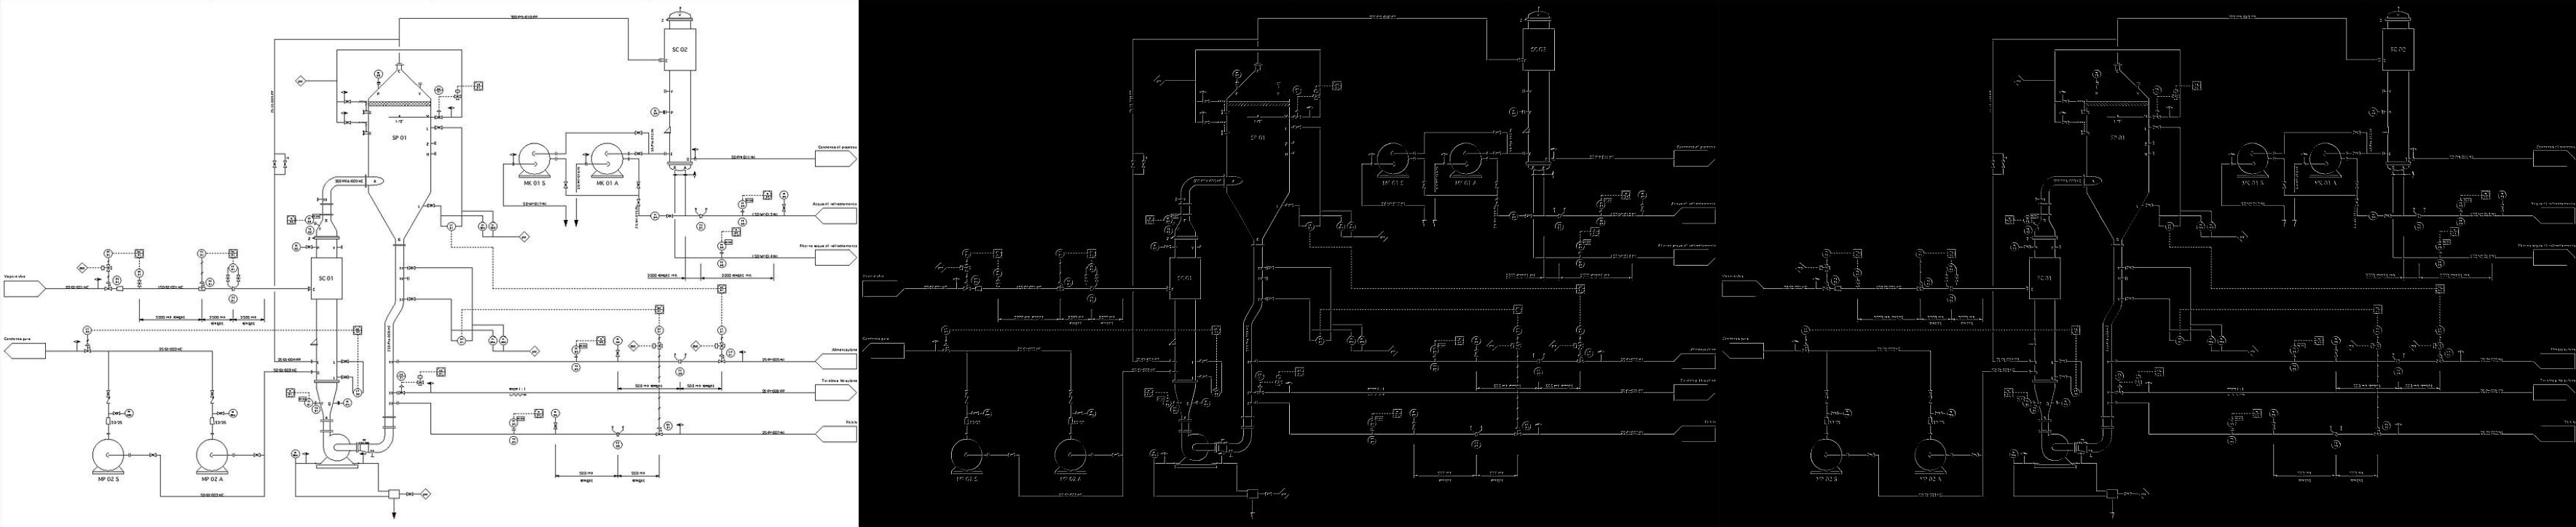

In [7]:
# 로버츠 교차 필터를 통한 X,Y 경계선 검출

from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2

src = cv2.imread('/content/test.png')

# 로버츠 커널 생성 ---①
gx_kernel = np.array([[1,0], [0,-1]])
gy_kernel = np.array([[0, 1],[-1,0]])

# 커널 적용 ---② 
edge_gx = cv2.filter2D(src, -1, gx_kernel)
edge_gy = cv2.filter2D(src, -1, gy_kernel)
# 결과 출력
merged = np.hstack((src, edge_gx, edge_gy))
cv2_imshow(merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

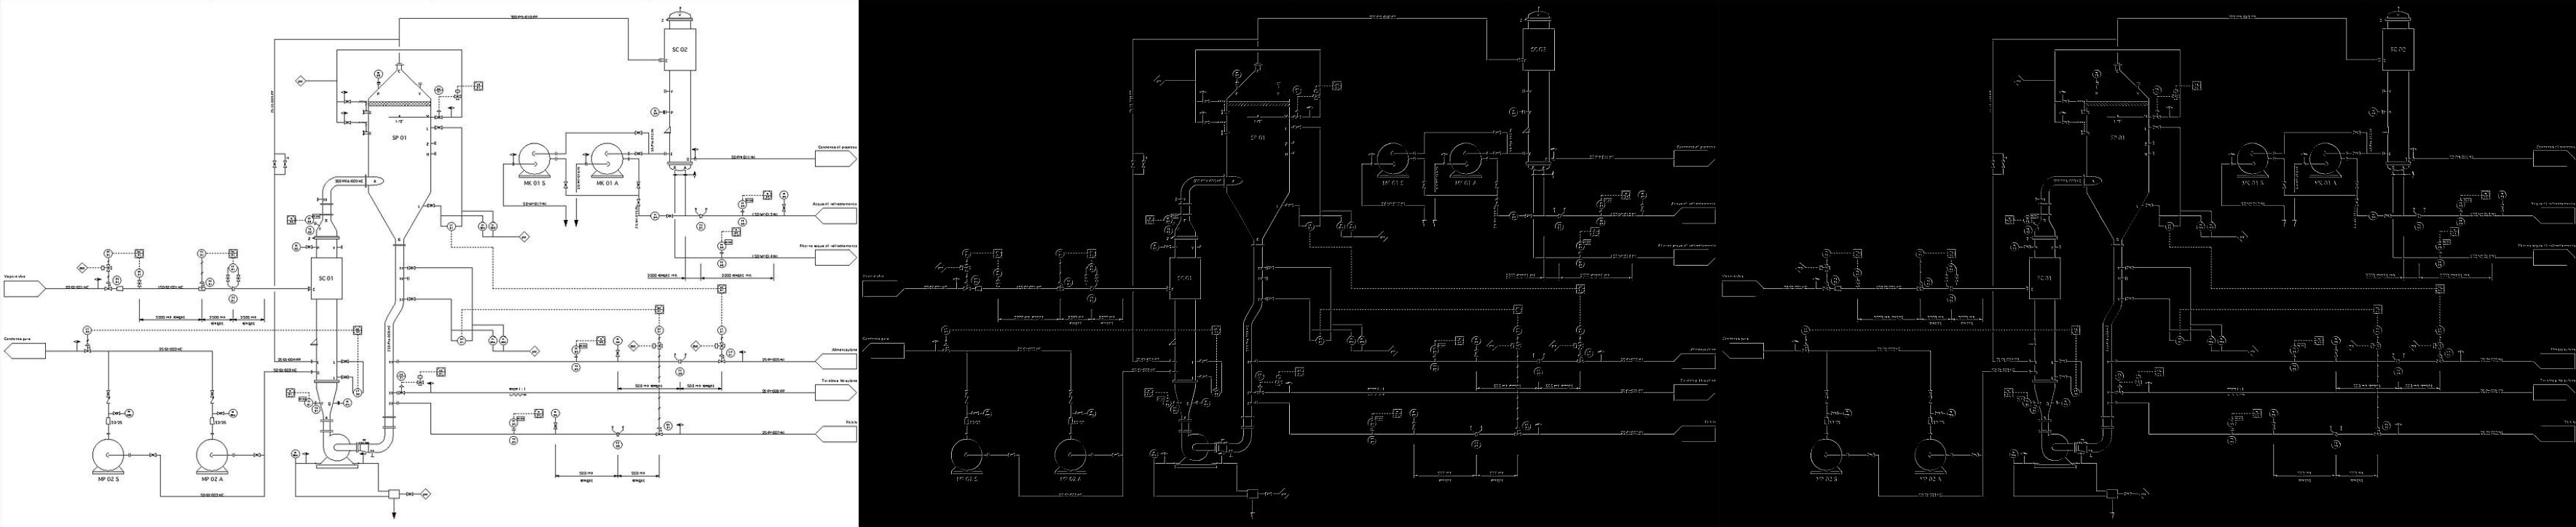

In [8]:
# 프리윗 마스크를 통한 경계선 검출

from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2

src = cv2.imread('/content/test.png')

# 프리윗 커널 생성
gx_k = np.array([[-1,0,1], [-1,0,1],[-1,0,1]])
gy_k = np.array([[-1,-1,-1],[0,0,0], [1,1,1]])

# 프리윗 커널 필터 적용
edge_gx = cv2.filter2D(src, -1, gx_kernel)
edge_gy = cv2.filter2D(src, -1, gy_kernel)
# 결과 출력
merged = np.hstack((src, edge_gx, edge_gy))
cv2_imshow(merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# 프리윗 마스크를 통한 경계선 검출

from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2

src = cv2.imread('/content/test.png')

# 소벨 커널을 직접 생성해서 엣지 검출 ---①
## 소벨 커널 생성
gx_k = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])
gy_k = np.array([[-1,-2,-1],[0,0,0], [1,2,1]])
## 소벨 필터 적용
edge_gx = cv2.filter2D(src, -1, gx_k)
edge_gy = cv2.filter2D(src, -1, gy_k)

# 소벨 API를 생성해서 엣지 검출
sobelx = cv2.Sobel(src, -1, 1, 0, ksize=3)
sobely = cv2.Sobel(src, -1, 0, 1, ksize=3) 

# 결과 출력
merged1 = np.hstack((src, edge_gx, edge_gy, edge_gx+edge_gy))
merged2 = np.hstack((src, sobelx, sobely, sobelx+sobely))
merged = np.vstack((merged1, merged2))
cv2_imshow(merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

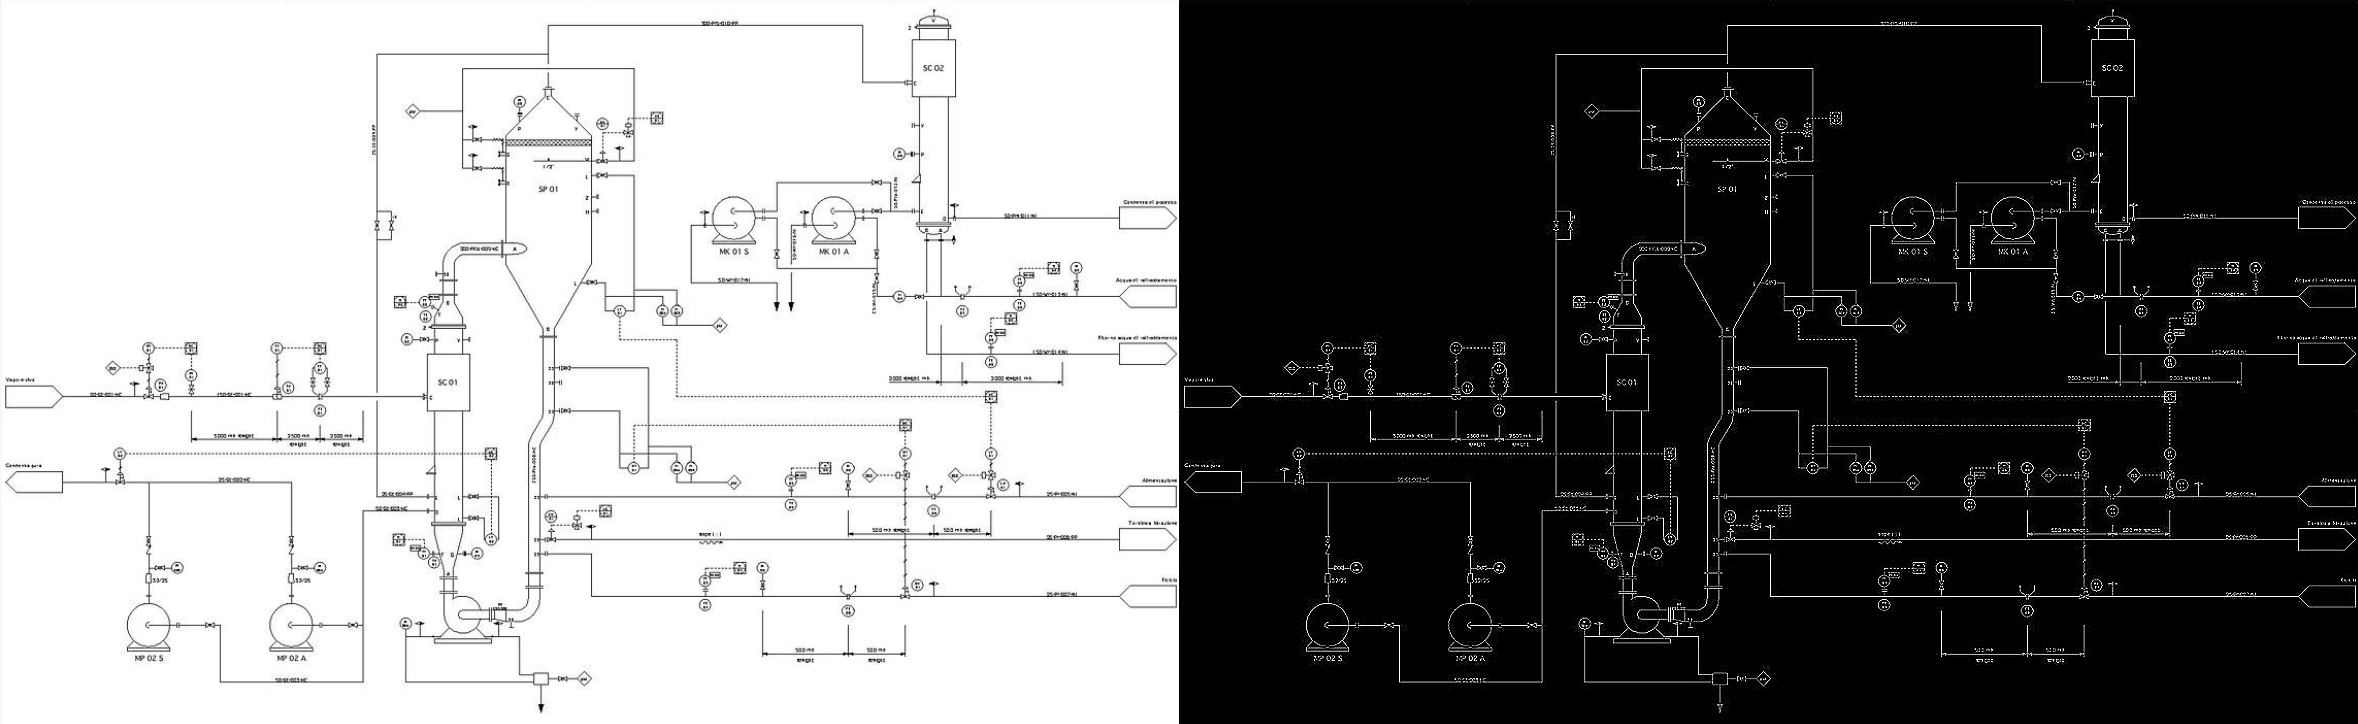

In [10]:
# 소벨 마스크크를 통한 경계선 검출

from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2

src = cv2.imread('/content/test.png')

# 라플라시안 필터 적용 ---①
edge = cv2.Laplacian(src, -1)

# 결과 출력
merged = np.hstack((src, edge))
cv2_imshow(merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

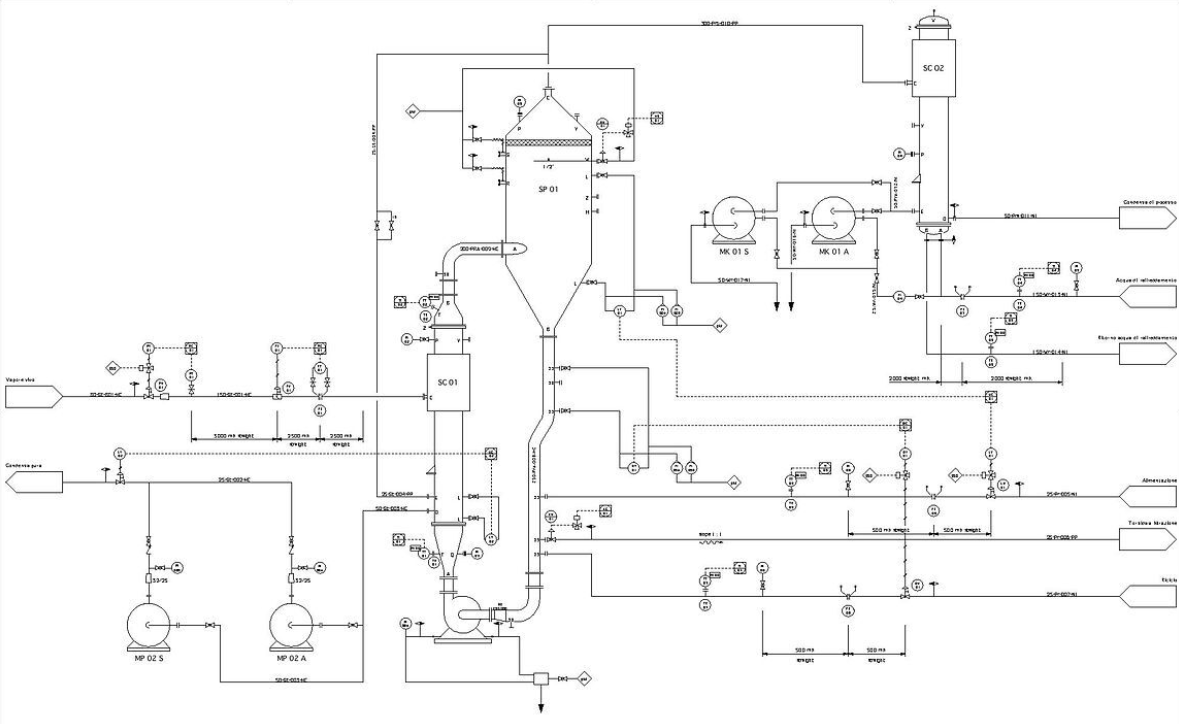

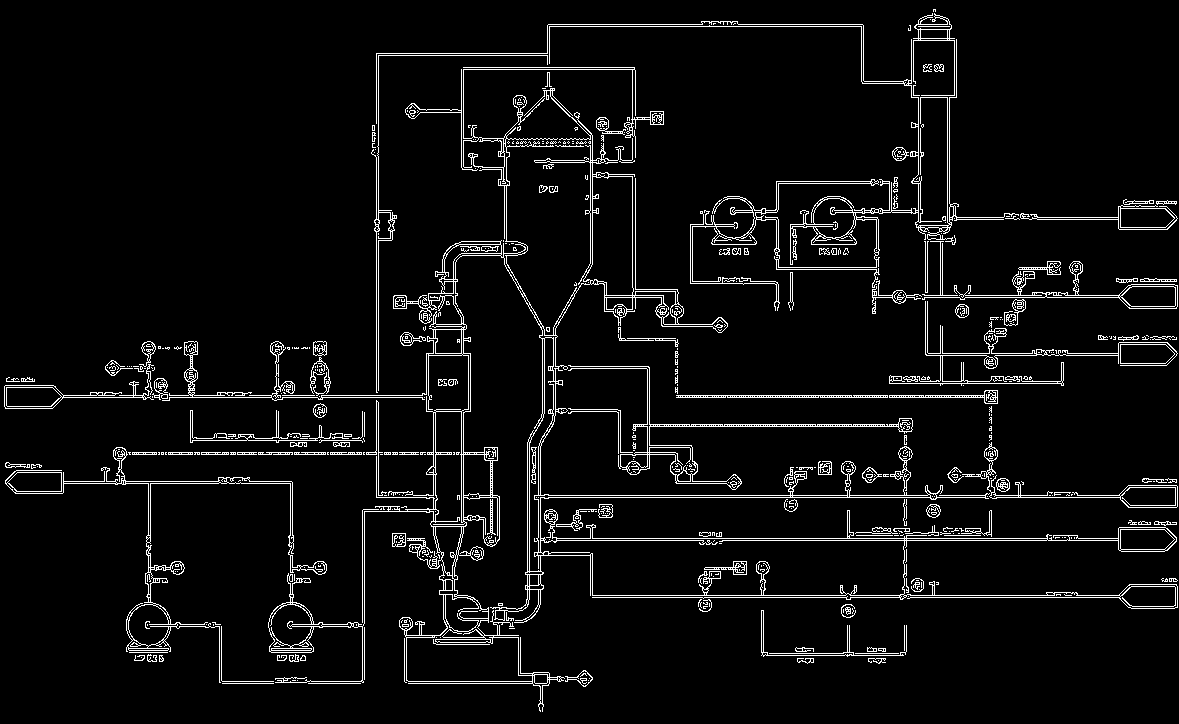

In [11]:
# 캐니 엣지 검출
from google.colab.patches import cv2_imshow
import sys
import cv2, time
import numpy as np

src = cv2.imread('/content/test.png')

# 케니 엣지 적용 
edges = cv2.Canny(src,100,200)

# 결과 출력
cv2_imshow(src)
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

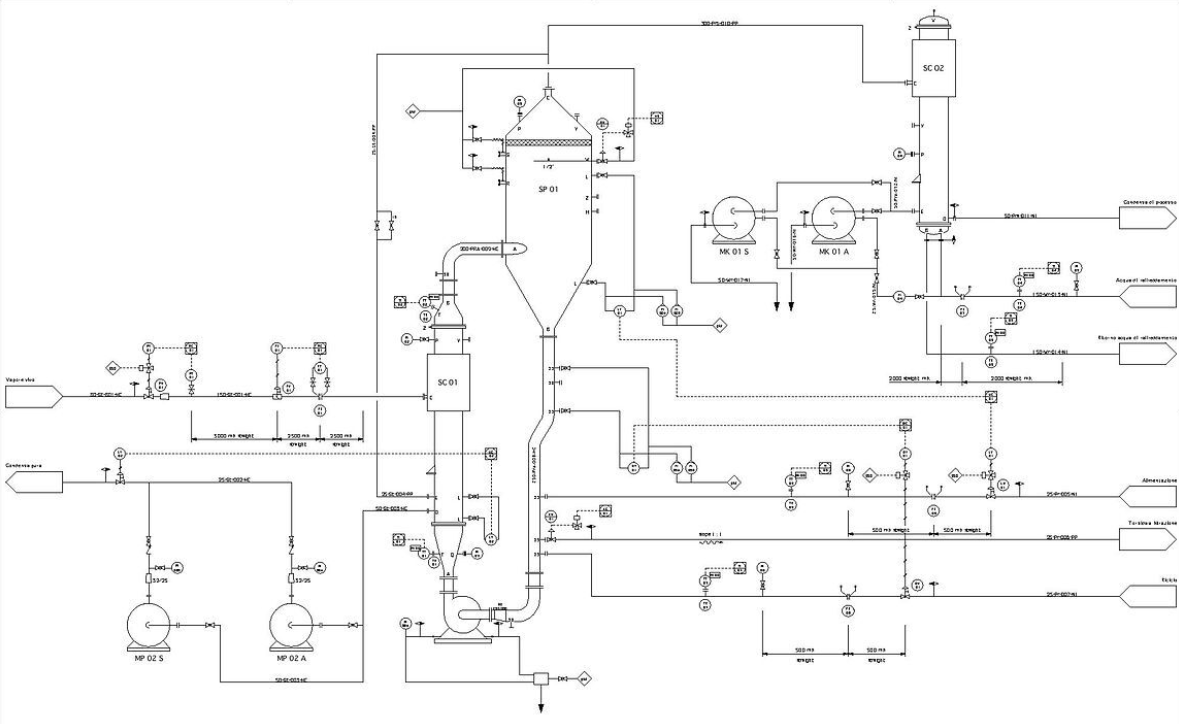

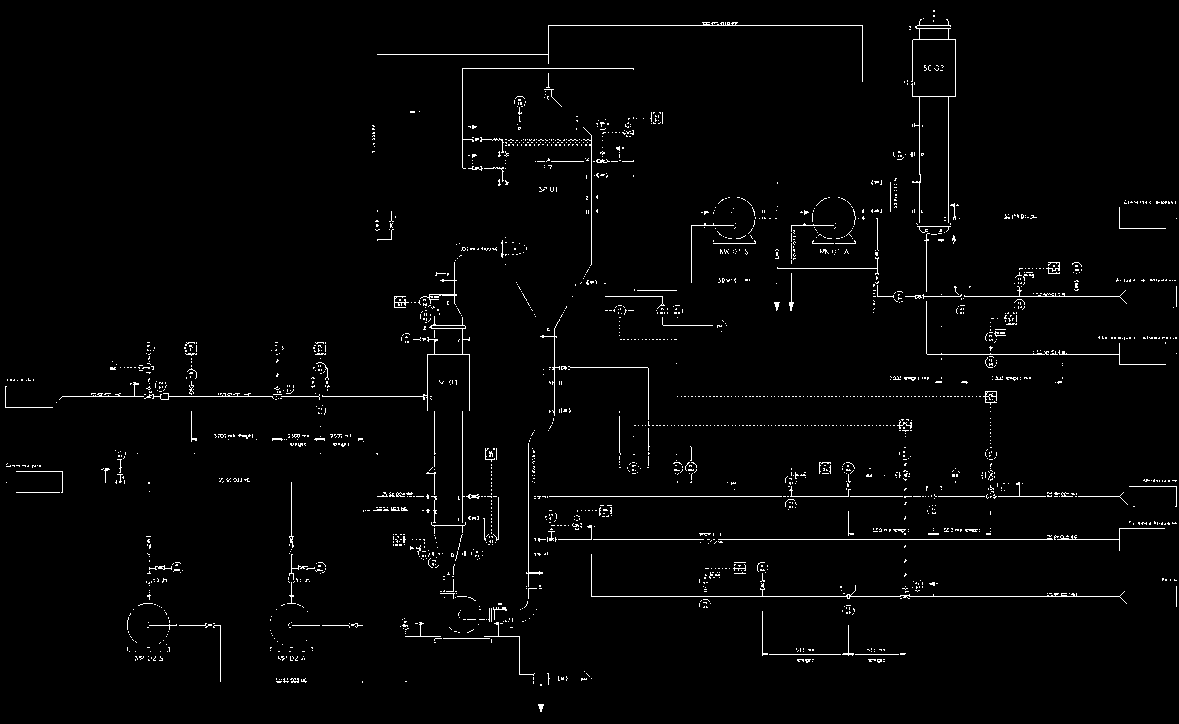

In [12]:
# 세션화
from google.colab.patches import cv2_imshow
import sys
import cv2, time
import numpy as np

img = cv2.imread('/content/test.png', cv2.IMREAD_GRAYSCALE)
_, biimg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# 거리 변환 ---①
dst = cv2.distanceTransform(biimg, cv2.DIST_L2, 5)
# 거리 값을 0 ~ 255 범위로 정규화 ---②
dst = (dst/(dst.max()-dst.min()) * 255).astype(np.uint8)
# 거리 값에 쓰레시홀드로 완전한 뼈대 찾기 ---③
skeleton = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                                 cv2.THRESH_BINARY, 7, -3)
# 결과 출력
cv2_imshow(img)
cv2_imshow(skeleton)
cv2.waitKey(0)
cv2.destroyAllWindows()

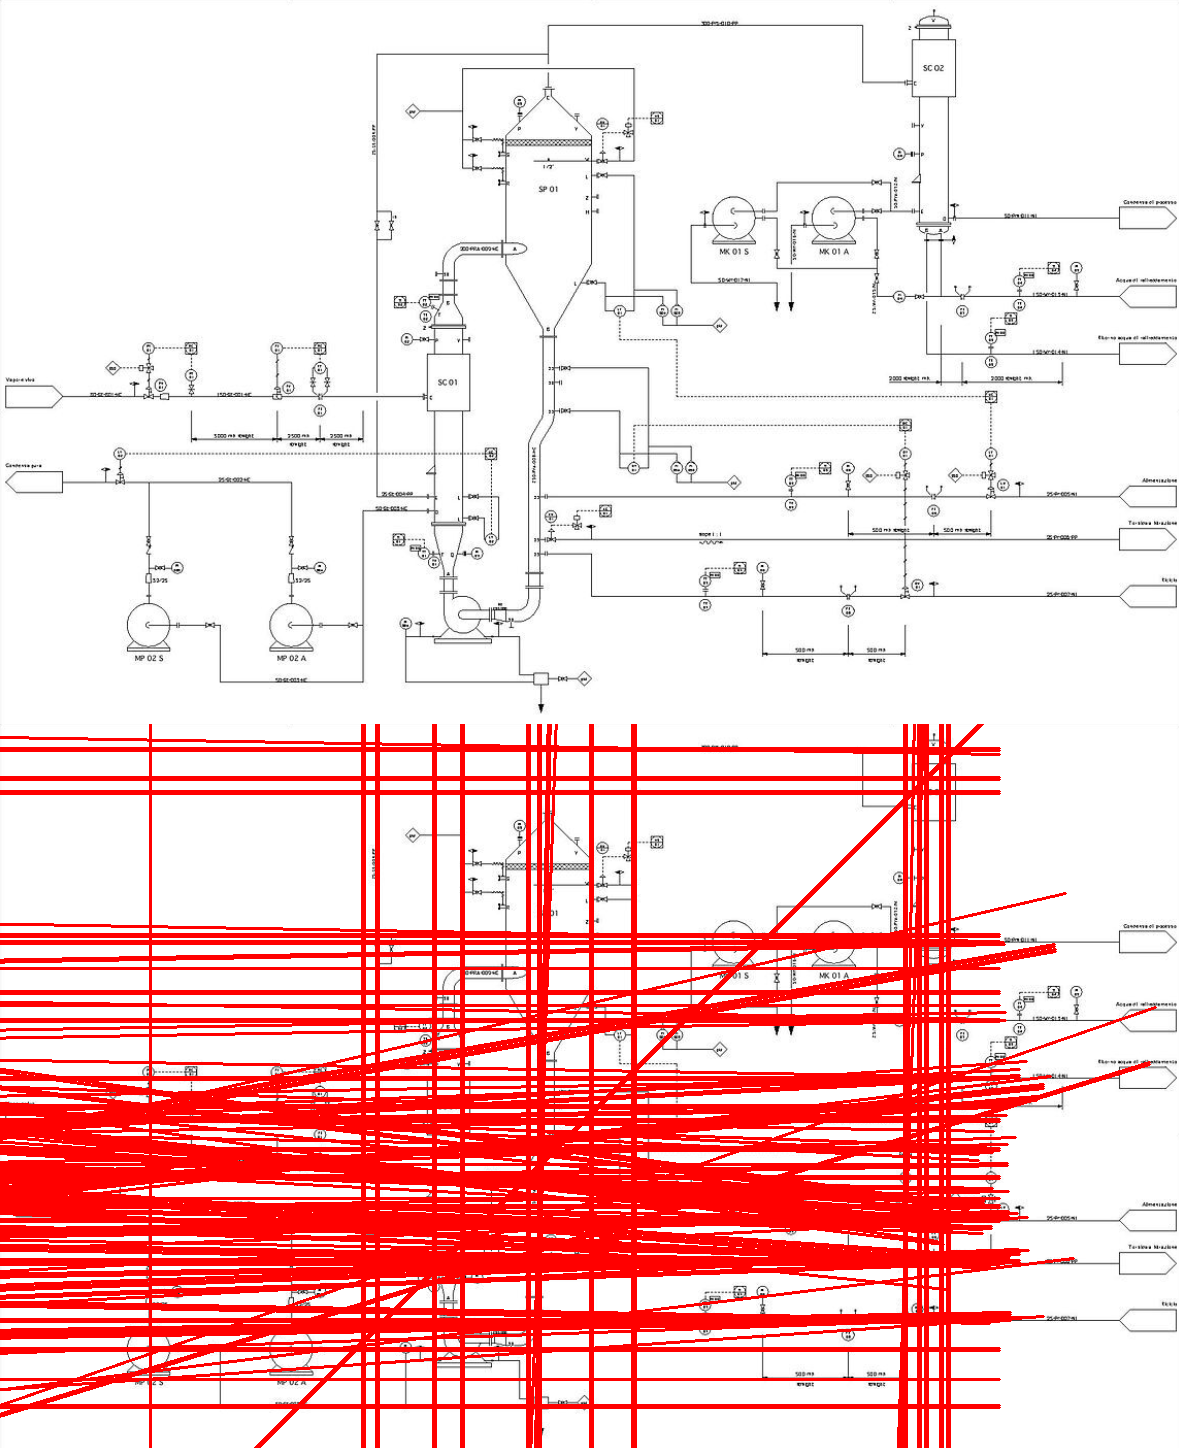

In [13]:
#허프 변환
from google.colab.patches import cv2_imshow
import sys
import cv2, time
import numpy as np

img = cv2.imread('/content/test.png')
img_original = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)

lines = cv2.HoughLines(edges,1,np.pi/180,150)

for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0+1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 -1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

res = np.vstack((img_original,img))
cv2_imshow(res)
cv2.waitKey(0)
cv2.destroyAllWindows()

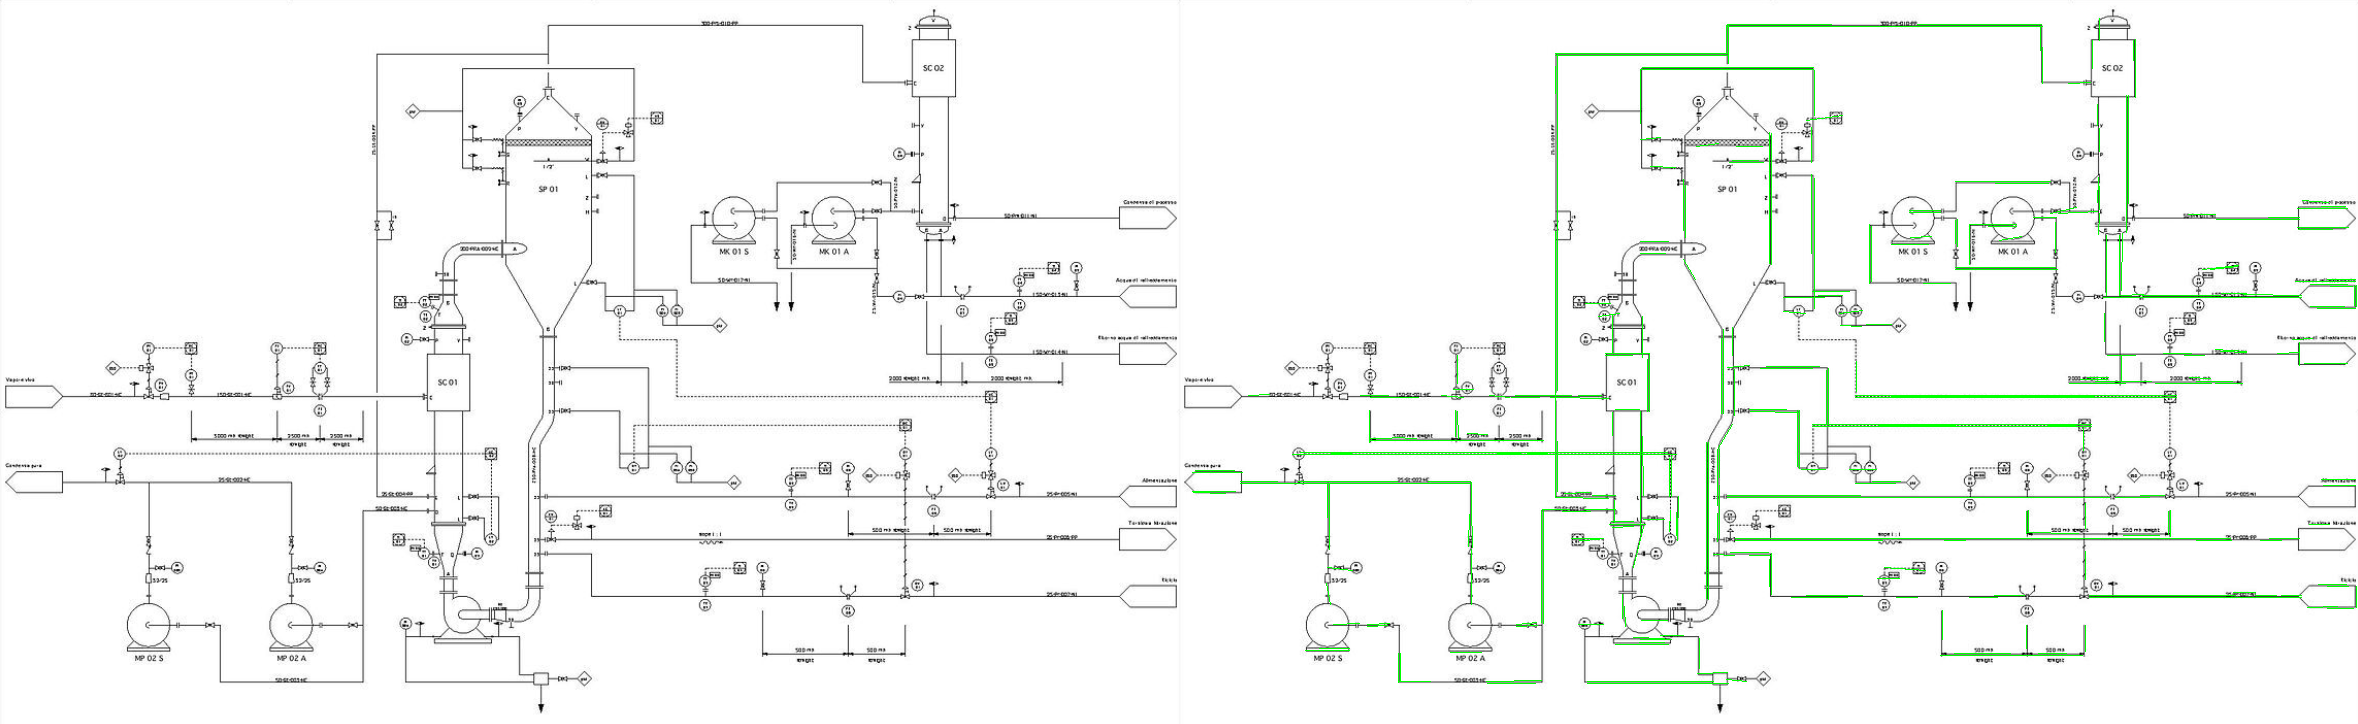

In [14]:
#확률적 허프 변환
from google.colab.patches import cv2_imshow
import sys
import cv2, time
import numpy as np

img = cv2.imread('/content/test.png')

img2 = img.copy()
# 그레이 스케일로 변환 및 엣지 검출 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 50, 200 )

# 확율 허프 변환 적용 ---②
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, None, 20, 2)
for line in lines:
    # 검출된 선 그리기 ---③
    x1, y1, x2, y2 = line[0]
    cv2.line(img2, (x1,y1), (x2, y2), (0,255,0), 1)

merged = np.hstack((img, img2))
cv2_imshow( merged)
cv2.waitKey()
cv2.destroyAllWindows()